
Creating initial graph...
Graph initialized with 12 nodes.

Adding nodes...


100%|██████████| 188/188 [00:00<00:00, 2307.99it/s]

Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge already exists! Retrying...
Edge alrea

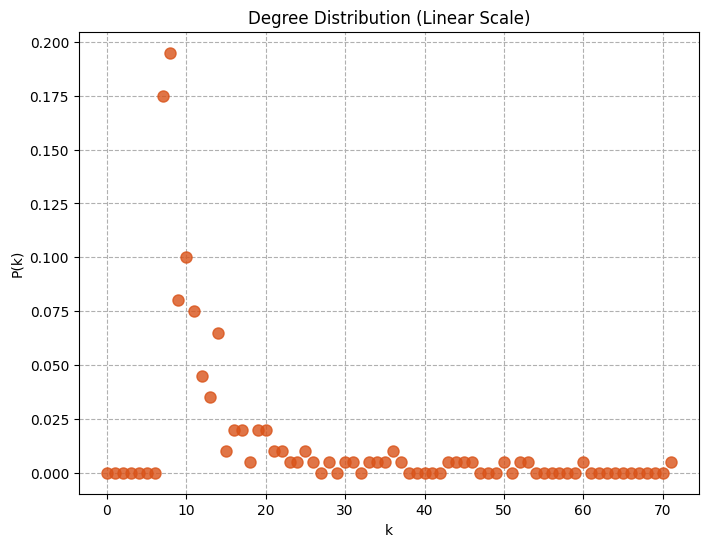

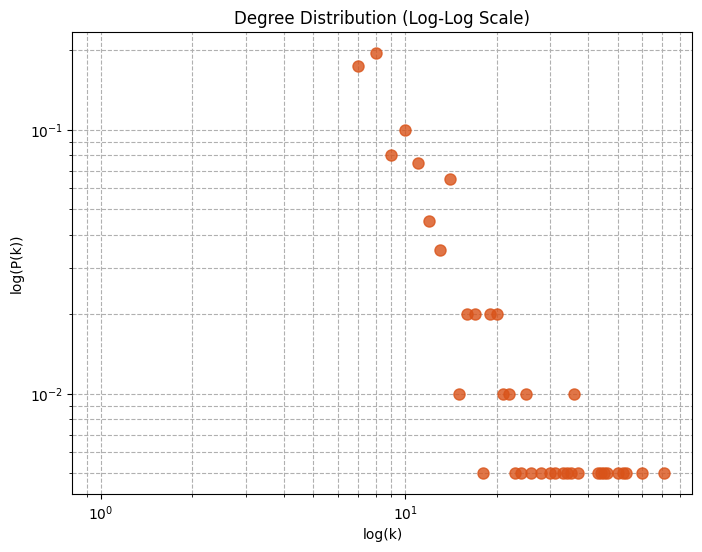

Average Clustering Coefficient: 0.1714
Characteristic Path Length: 2.2439


In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import deque

def plot_degree_distribution(graph, scale='linear', color='#D95319', alpha=0.8, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1):
    plt.close()
    num_nodes = len(graph)
    degrees = [len(neighbors) for neighbors in graph.values()]
    max_degree = max(degrees) if degrees else 0
    
    degree_counts = [0] * (max_degree + 1)
    for degree in degrees:
        degree_counts[degree] += 1
    
    degree_probabilities = [count / num_nodes for count in degree_counts]
    
    plt.figure(figsize=(8, 6))
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree Distribution (Log-Log Scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
    else:
        plt.title('Degree Distribution (Linear Scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')
    
    plt.plot(range(max_degree + 1), degree_probabilities, 'o', markersize=8, color=color, alpha=alpha)
    plt.grid(True, which="both", linestyle="--")
    
    if fit_line and scale == 'log':
        x_vals = list(range(expct_lo, expct_hi))
        y_vals = [(x ** -3) * expct_const for x in x_vals]
        plt.plot(x_vals, y_vals, color='#7f7f7f', linestyle='dashed')
    
    plt.show()

def select_node_by_probability(graph):
    degrees = {node: len(neighbors) for node, neighbors in graph.items()}
    total_degree = sum(degrees.values())
    probabilities = [deg / total_degree for deg in degrees.values()]
    return np.random.choice(list(degrees.keys()), p=probabilities)

def add_edge_to_graph(graph, new_node):
    existing_node = select_node_by_probability(graph) if graph else 0
    if new_node in graph[existing_node]:
        print("Edge already exists! Retrying...")
        add_edge_to_graph(graph, new_node)
    else:
        graph[new_node].add(existing_node)
        graph[existing_node].add(new_node)

def bfs_shortest_path_length(graph, start_node):
    queue = deque([(start_node, 0)])
    visited = {start_node}
    path_lengths = []
    
    while queue:
        node, depth = queue.popleft()
        path_lengths.append(depth)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, depth + 1))
    
    return sum(path_lengths) / len(path_lengths) if path_lengths else 0

def compute_characteristic_path_length(graph):
    if not graph:
        return 0
    total_length = sum(bfs_shortest_path_length(graph, node) for node in graph)
    return total_length / len(graph)

def assess_topology(graph):
    clustering_coeffs = []
    for node in graph:
        neighbors = graph[node]
        if len(neighbors) < 2:
            clustering_coeffs.append(0)
        else:
            links = sum(1 for neighbor in neighbors for other in neighbors if other in graph[neighbor]) // 2
            clustering_coeffs.append(2 * links / (len(neighbors) * (len(neighbors) - 1)))
    avg_clustering_coeff = sum(clustering_coeffs) / len(graph)
    print(f"Average Clustering Coefficient: {avg_clustering_coeff:.4f}")

    char_path_length = compute_characteristic_path_length(graph)
    print(f"Characteristic Path Length: {char_path_length:.4f}")

def barabasi_albert_simulation():
    init_nodes = int(input("Enter the initial number of nodes (m_0): "))
    final_nodes = int(input("Enter the final number of nodes: "))
    m_parameter = int(input("Enter the value of m parameter (m <= m_0): "))
    
    if m_parameter > init_nodes:
        print("Value of m parameter can't be greater than m0, please retry!!")
    else:
        print("\nCreating initial graph...")
        graph = {i: set(j for j in range(init_nodes) if j != i) for i in range(init_nodes)}
        print(f"Graph initialized with {len(graph)} nodes.")
        
        new_node = init_nodes
        print("\nAdding nodes...")
        for _ in tqdm(range(final_nodes - init_nodes)):
            graph[new_node] = set()
            for _ in range(m_parameter):
                add_edge_to_graph(graph, new_node)
            new_node += 1
        
        print(f"\nFinal number of nodes reached: {len(graph)}")
        
        plot_degree_distribution(graph)
        plot_degree_distribution(graph, scale='log', fit_line=False)
        assess_topology(graph)

if __name__ == "__main__":
    barabasi_albert_simulation()
